In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#데이터 로드 및 train / test set 나누기.

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

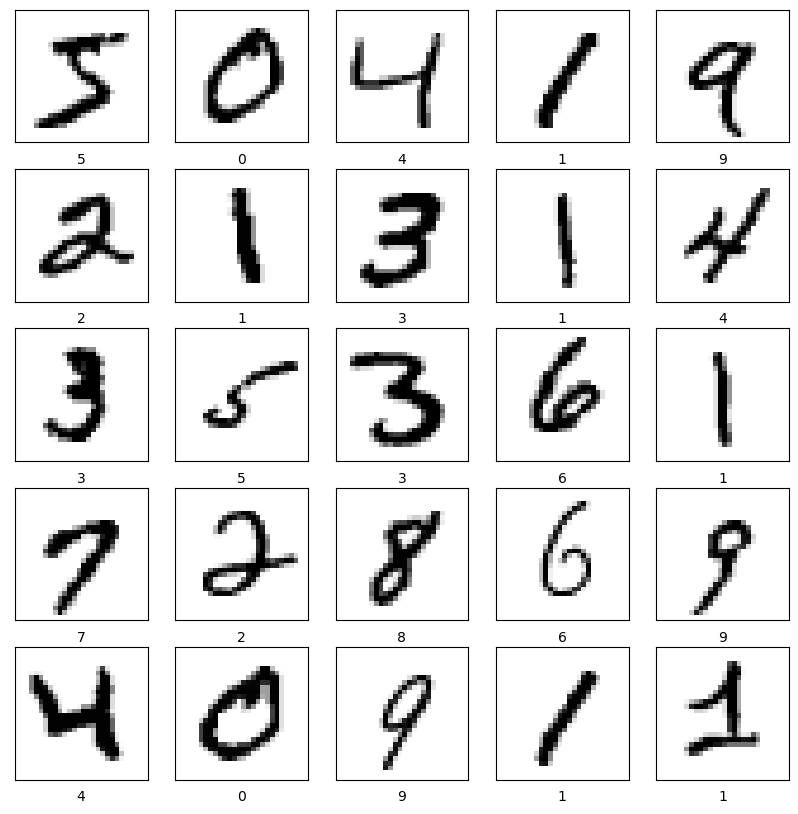

In [3]:
# train set 이미지 확인과 label 확인 ( 예시로 보기 위해 25개만 설정)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()


Dense 레이어는 입력과 출력을 모두 연결해주며, 
입력과 출력을 각각 연결해주는 가중치를 포함하고 있다. 즉, 입력이 4개, 출력이 8개라면 가중치는 총 32개가 존재한다.  
그리고 이 Dense 레이어는 가장 머신러닝에 
기본적인 층으로 영상이나 서로 연속적으로 상관관계가 있는 데이터가 아니라면 이 층을 통해 학습 시킬 수 있는 데이터가 많다.

activaiton 에서는 무엇을 사용할 지 고민을 많이 할 수 있는데, 'relu' 는 은닉층으로 역전파를 통해 좋은 성능이 나오기 때문에 마지막 
층이 아니고서야 거의 relu 를 이용한다.

마지막 층에서는 'sigmond' 와 'softmax' 를 사용함으로서 sigmond 는 'yes or no' 와 같은 이진 분류, softmax 는 확률 값을 
내뱉어내 다양한 것을 분류하기 위함이다.

즉, 당도, 나트륨, 구성 요소 등을 보고 콜라, 사이다, 환타를 구별해내려면 'softmax', 
공기 구성 요소를 보고 '미세먼지 경보냐? 아니냐?'는 sigmond 를 이용하게 된다.

In [4]:
#model
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')])

In [5]:
model.compile(optimizer =tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#sparse_categorical_crossentropy << label이 정수로 인코딩 되었을 때 사용합니다. 
#categorical_crossentropy << label이 one_hot 인코딩 되었을 때 사용합니다.

In [7]:
#학습 진행
hist = model.fit(x_train, y_train, epochs=20, batch_size=1000, validation_data=(x_test,y_test))

Epoch 1/20
60/60 [==============================] - 1s 9ms/step - loss: 1.0118 - accuracy: 0.7037 - val_loss: 0.9007 - val_accuracy: 0.8848
Epoch 2/20
60/60 [==============================] - 0s 7ms/step - loss: 0.4203 - accuracy: 0.8935 - val_loss: 0.5213 - val_accuracy: 0.9332
Epoch 3/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2872 - accuracy: 0.9254 - val_loss: 0.2918 - val_accuracy: 0.9522
Epoch 4/20
60/60 [==============================] - 0s 7ms/step - loss: 0.2280 - accuracy: 0.9390 - val_loss: 0.1956 - val_accuracy: 0.9593
Epoch 5/20
60/60 [==============================] - 0s 7ms/step - loss: 0.1847 - accuracy: 0.9506 - val_loss: 0.1467 - val_accuracy: 0.9629
Epoch 6/20
60/60 [==============================] - 0s 7ms/step - loss: 0.1603 - accuracy: 0.9557 - val_loss: 0.1211 - val_accuracy: 0.9670
Epoch 7/20
60/60 [==============================] - 0s 7ms/step - loss: 0.1401 - accuracy: 0.9614 - val_loss: 0.1056 - val_accuracy: 0.9696
Epoch 8/20
60/60 [==

In [24]:
# 내 손글씨 로드 
# pip install opencv-python
import glob
from PIL import Image
import numpy as np 
import cv2
sample = [] 

groups_folder_path = 'sample' 
    
image_dir = groups_folder_path + '/'
files = glob.glob(image_dir + '/*.jpg')
    

for i in files:
   
    img = Image.open(i).convert('L')
    img = img.resize((28,28))
    train = np.asarray(img)
    a, train = cv2.threshold(train,100,255,cv2.THRESH_BINARY) 
    sample.append(train)    


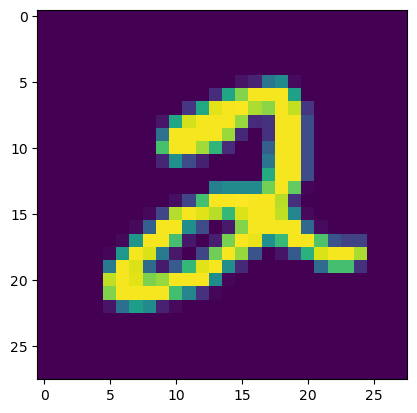

In [25]:
plt.imshow(sample[9])
plt.imshow(x_train[5])

In [26]:
sample = np.array(sample)
sample.reshape(10,28,28,1)

array([[[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        ...,

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]]],


       [[[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [255],
         [255]],

        [[255],
         [255],
         [255],
         ...,
         [255],
         [

In [27]:
import cv2
sample = cv2.bitwise_not(sample)

In [28]:
sample

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [29]:
predictions = model.predict(sample)
np.argmax(predictions[8])

1/1 [==============================] - 0s 22ms/step


5

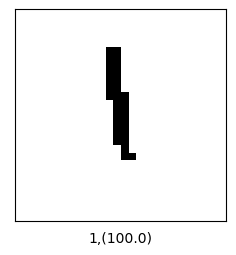

In [30]:
def plot_image(i, predictions_array, img):
    predictions_array, img = predictions_array[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    plt.xlabel("{},({})".format(predicted_label,100*np.max(predictions_array))) 
                                    
#test셋과 예측값 / 원래 라벨 비교 ( i에 보고싶은 test셋의 인덱스를 적으세요)


i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, sample)
#plt.subplot(1,2,2)    
#plot_value_array(i, predictions,  Y_test)
plt.show()

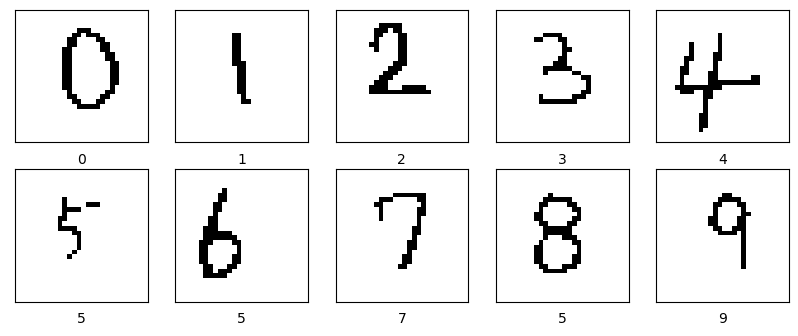

Test loss: 0.07656821608543396
Test accuracy: 0.9790999889373779


In [33]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

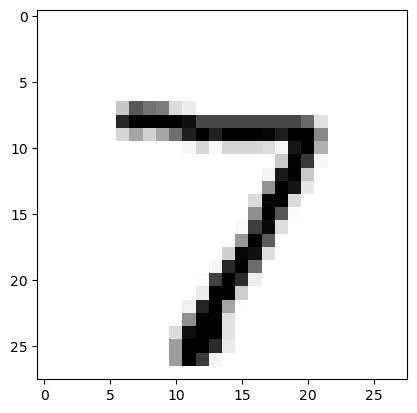

1/1 [==============================] - 0s 31ms/step
내가 본 글자는 7


In [34]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
predictions = model.predict(x_test[n].reshape((1, 28, 28)))
predicted_class = np.argmax(predictions)

print('내가 본 글자는', predicted_class)

In [35]:
import random

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=0)

wrong_result = []



313/313 [==============================] - 1s 2ms/step


In [36]:
#test_labels
predicted_labels[0]

7

In [37]:
model.save('myhand_CNN_model.h5')